In [3]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('font', family='AppleGothic')
import seaborn as sns

import numpy as np

from collections import Counter

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

## Load dataSet

In [5]:
train = pd.read_csv("./")
print(train.shape)
train.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
train.describe()

In [ ]:
test = pd.read_csv("./")
print(test.shape)
test.head()

In [6]:
test.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Remove outliers

In [35]:
feature_names = []

In [36]:
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

Outliers_to_drop = detect_outliers(train,2,feature_names)
train.loc[Outliers_to_drop]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [37]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
print(train.shape)
train.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [38]:
train.shape

(17379, 17)

## Feature analysis & engineering

In [39]:
feature_names = []

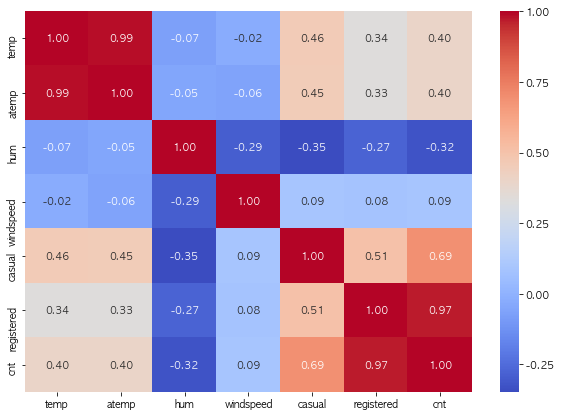

In [40]:
plt.figure(figsize=(10, 7))
# 숫자 feature column에 대해
sns.heatmap(train[feature_names].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### column name

## Detect null data

In [56]:
train.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
test.isnull().sum()

## Modeling

In [124]:
feature_names = []
label_name = ""

In [125]:
X_train = train[feature_names]
Y_train = train[label_name]

### scoring

In [126]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

### cross validate models

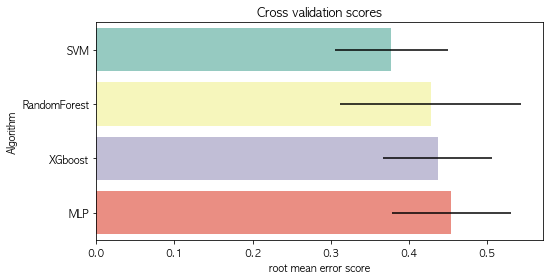

In [127]:
random_state = 2
# 이름 변경
classifiers = []
# 모델 변경
# SVR은 randomState없다
regressors.append(SVC(random_state=random_state))
regressors.append(RandomForestClassifier(random_state=random_state))
regressors.append(xgb.XGBClassifier(random_state=random_state))
regressors.append(MLPClassifier(random_state=random_state))

cv_results = []
# 이름 변경
for regressor in regressors :
    # scoring방식 변경
    cv_results.append(cross_val_score(regressor, X_train, y = Y_train, scoring = "accuracy", cv = 10, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVM","RandomForest","XGboost",
"MLP"]})

plt.figure(figsize=(8, 4))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("root mean error score")
g = g.set_title("Cross validation scores")

## Parameter tuning

### SVM

In [131]:
num_epoch = 20

hyperparameters_list = []

for epoch in range(num_epoch):
    gamma = 10 ** -np.random.uniform(low=0, high=5)
    C = np.random.randint(low=1, high=1000)
    # 모델 변경
    model = SVC(random_state=random_state,
                kernel="rbf",
                gamma=gamma,
                C=C)
    # scoring 방식 변경
    score = cross_val_score(model, X_train, Y_train, cv=10, scoring="accuracy", n_jobs=-1).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'gamma': gamma,
        'C': C,
    }

    hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} gamma = {gamma:.10f}, C = {C}, Score = {score:.5f}")

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# 정렬 방식 변경
hyperparameters_list = hyperparameters_list.sort_values(by="score", ascending=False)
print(hyperparameters_list.shape)
hyperparameters_list.head(10)

KeyboardInterrupt: 

In [32]:
best_hyperparameters = hyperparameters_list.iloc[0]
best_gamma = best_hyperparameters["gamma"]
best_C = best_hyperparameters["C"]
# 이름, 모델 변경, random_state유무 확인
best_SVMC = SVC(random_state=random_state,
                kernel="rbf",
                gamma=best_gamma,
                C=best_C)
best_SVMC

SVC(C=729.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000260921229690988,
  kernel='rbf', max_iter=-1, probability=False, random_state=2,
  shrinking=True, tol=0.001, verbose=False)

### Random Forest

In [33]:
num_epoch = 20

hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.randint(low=1, high=10)
    # samples_split은 2이상 값
    min_samples_split = np.random.randint(low=2, high=10)
    min_samples_leaf = np.random.randint(low=1, high=10)
    n_estimators = np.random.randint(low=10, high=1000)
    # 모델 변경
    model = RandomForestClassifier(random_state=2,
                                    max_depth=max_depth,
                                    max_features=max_features,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    n_estimators=n_estimators)
    # score 변경
    score = cross_val_score(model, X_train, Y_train, cv=10, scoring="accuracy", n_jobs=-1).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'max_depth': max_depth,
        'max_features' : max_features,
        'min_samples_split': min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'n_estimators': n_estimators
    }

    hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} max_depth = {max_depth}, max_features = {max_features}, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}, n_estimators = {n_estimators}, Score = {score:.5f}")

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# 정렬 방식 변경
hyperparameters_list = hyperparameters_list.sort_values(by="score", ascending=False)
print(hyperparameters_list.shape)
hyperparameters_list.head(10)

 0 max_depth = 20, max_features = 2, min_samples_split = 9, min_samples_leaf = 4, n_estimators = 161, Score = 0.82863
 1 max_depth = 87, max_features = 8, min_samples_split = 2, min_samples_leaf = 4, n_estimators = 294, Score = 0.83318
 2 max_depth = 16, max_features = 6, min_samples_split = 8, min_samples_leaf = 5, n_estimators = 270, Score = 0.82865
 3 max_depth = 49, max_features = 6, min_samples_split = 3, min_samples_leaf = 1, n_estimators = 166, Score = 0.81957
 4 max_depth = 70, max_features = 3, min_samples_split = 3, min_samples_leaf = 9, n_estimators = 563, Score = 0.82068
 5 max_depth = 52, max_features = 7, min_samples_split = 4, min_samples_leaf = 8, n_estimators = 606, Score = 0.83205
 6 max_depth = 51, max_features = 7, min_samples_split = 6, min_samples_leaf = 7, n_estimators = 280, Score = 0.82524
 7 max_depth = 66, max_features = 5, min_samples_split = 6, min_samples_leaf = 6, n_estimators = 504, Score = 0.82864
 8 max_depth = 30, max_features = 9, min_samples_split =

,epoch,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,score
8,8,30,9,3,6,687,0.838853
9,9,46,9,3,2,767,0.836581
1,1,87,8,4,2,294,0.833184
17,17,27,1,2,5,440,0.833172
14,14,93,9,8,8,284,0.832061
12,12,12,9,1,8,13,0.832048
5,5,52,7,8,4,606,0.832048
10,10,53,6,3,7,750,0.830899
13,13,26,8,8,2,369,0.829775
2,2,16,6,5,8,270,0.828652


In [34]:
best_hyperparameters = hyperparameters_list.iloc[0]
best_max_depth = int(best_hyperparameters["max_depth"])
best_max_features = int(best_hyperparameters["max_features"])
best_min_samples_split = int(best_hyperparameters["min_samples_split"])
best_min_samples_leaf = int(best_hyperparameters["min_samples_leaf"])
best_n_estimators = int(best_hyperparameters["n_estimators"])
best_RFC = RandomForestClassifier(random_state=2,
                max_depth=best_max_depth,
                max_features=best_max_features,
               min_samples_split=best_min_samples_split,
               min_samples_leaf=best_min_samples_leaf,
               n_estimators=best_n_estimators)
best_RFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=47, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=829, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

### XGboost

In [37]:
num_epoch = 20

hyperparameters_list = []

for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=100, high=1000)
    max_depth = np.random.randint(low=2, high=100)
    learning_rate = 10 ** -np.random.uniform(low=0, high=7)
    subsample = np.random.uniform(low=0.1, high=1.0)
    colsample_bytree = np.random.uniform(low=0.4, high=1.0)
    colsample_bylevel = np.random.uniform(low=0.4, high=1.0)
    # 모델 변경
    model = xgb.XGBClassifier(random_state=2,
                            n_estimators=n_estimators,
                             max_depth=max_depth,
                             learning_rate=learning_rate,
                             subsample=subsample,
                             colsample_bylevel=colsample_bylevel,
                             colsample_bytree=colsample_bytree,
                             seed=37)
    # scoring 방식 변경
    score = cross_val_score(model, X_train, Y_train, cv=10, scoring="accruacy", n_jobs=-1).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'subsample': subsample,
        'colsample_bylevel': colsample_bylevel,
        'colsample_bytree': colsample_bytree,
    }

    hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, learning_rate = {learning_rate:.10f}, subsample = {subsample:.6f}, colsample_bylevel = {colsample_bylevel:.6f}, colsample_bytree = {colsample_bytree:.6f}, Score = {score:.5f}")

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# 정렬 방식 변경
hyperparameters_list = hyperparameters_list.sort_values(by="score", ascending=False)
print(hyperparameters_list.shape)
hyperparameters_list.head(10)

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 0 n_estimators = 862, max_depth =  3, learning_rate = 0.0114717285, subsample = 0.672460, colsample_bylevel = 0.524312, colsample_bytree = 0.589119, Score = 0.82634


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 1 n_estimators = 398, max_depth = 37, learning_rate = 0.0063241105, subsample = 0.757460, colsample_bylevel = 0.742692, colsample_bytree = 0.506315, Score = 0.82409


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 2 n_estimators = 616, max_depth = 14, learning_rate = 0.0000059680, subsample = 0.364979, colsample_bylevel = 0.409239, colsample_bytree = 0.634865, Score = 0.79010


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 3 n_estimators = 122, max_depth = 32, learning_rate = 0.0000002007, subsample = 0.840880, colsample_bylevel = 0.812606, colsample_bytree = 0.400182, Score = 0.79692


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 4 n_estimators = 349, max_depth = 76, learning_rate = 0.2496373640, subsample = 0.354326, colsample_bylevel = 0.668691, colsample_bytree = 0.611834, Score = 0.82300


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 5 n_estimators = 610, max_depth = 48, learning_rate = 0.0008147809, subsample = 0.642424, colsample_bylevel = 0.920330, colsample_bytree = 0.934782, Score = 0.82976


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 6 n_estimators = 217, max_depth = 80, learning_rate = 0.0017765272, subsample = 0.924462, colsample_bylevel = 0.877451, colsample_bytree = 0.910726, Score = 0.84111


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 7 n_estimators = 282, max_depth = 23, learning_rate = 0.0072323220, subsample = 0.783860, colsample_bylevel = 0.861403, colsample_bytree = 0.506269, Score = 0.82750


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 8 n_estimators = 899, max_depth = 42, learning_rate = 0.0000570072, subsample = 0.111179, colsample_bylevel = 0.888939, colsample_bytree = 0.519111, Score = 0.78560


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

 9 n_estimators = 783, max_depth = 13, learning_rate = 0.0000010571, subsample = 0.522193, colsample_bylevel = 0.787187, colsample_bytree = 0.447159, Score = 0.78557


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

10 n_estimators = 612, max_depth = 87, learning_rate = 0.0000965790, subsample = 0.948041, colsample_bylevel = 0.414344, colsample_bytree = 0.582844, Score = 0.80486


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

11 n_estimators = 712, max_depth = 68, learning_rate = 0.0000007716, subsample = 0.582291, colsample_bylevel = 0.757821, colsample_bytree = 0.557920, Score = 0.80824


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

12 n_estimators = 668, max_depth = 63, learning_rate = 0.0000017806, subsample = 0.432729, colsample_bylevel = 0.951921, colsample_bytree = 0.725828, Score = 0.81504


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

13 n_estimators = 174, max_depth = 59, learning_rate = 0.0000025240, subsample = 0.238337, colsample_bylevel = 0.736718, colsample_bytree = 0.930671, Score = 0.81728


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

14 n_estimators = 281, max_depth = 18, learning_rate = 0.0000005454, subsample = 0.321774, colsample_bylevel = 0.487210, colsample_bytree = 0.691987, Score = 0.81959


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

15 n_estimators = 661, max_depth = 89, learning_rate = 0.0030082196, subsample = 0.291361, colsample_bylevel = 0.742494, colsample_bytree = 0.989486, Score = 0.82752


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

16 n_estimators = 432, max_depth = 98, learning_rate = 0.0000013821, subsample = 0.223823, colsample_bylevel = 0.759454, colsample_bytree = 0.432109, Score = 0.78330


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

17 n_estimators = 309, max_depth = 19, learning_rate = 0.0000001915, subsample = 0.729514, colsample_bylevel = 0.639670, colsample_bytree = 0.537142, Score = 0.79580


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

18 n_estimators = 248, max_depth = 91, learning_rate = 0.0000043339, subsample = 0.309475, colsample_bylevel = 0.719684, colsample_bytree = 0.739416, Score = 0.81394


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

19 n_estimators = 189, max_depth = 80, learning_rate = 0.0875779790, subsample = 0.544752, colsample_bylevel = 0.445752, colsample_bytree = 0.865970, Score = 0.83317
(20, 8)


,colsample_bylevel,colsample_bytree,epoch,learning_rate,max_depth,n_estimators,score,subsample
6,0.877451,0.910726,6,1.776527e-03,80,217,0.841113,0.924462
19,0.445752,0.865970,19,8.757798e-02,80,189,0.833172,0.544752
5,0.920330,0.934782,5,8.147809e-04,48,610,0.829763,0.642424
15,0.742494,0.989486,15,3.008220e-03,89,661,0.827515,0.291361
7,0.861403,0.506269,7,7.232322e-03,23,282,0.827503,0.783860
0,0.524312,0.589119,0,1.147173e-02,3,862,0.826341,0.672460
1,0.742692,0.506315,1,6.324110e-03,37,398,0.824093,0.757460
4,0.668691,0.611834,4,2.496374e-01,76,349,0.822995,0.354326
14,0.487210,0.691987,14,5.454089e-07,18,281,0.819586,0.321774
13,0.736718,0.930671,13,2.524027e-06,59,174,0.817275,0.238337


In [38]:
best_hyperparameters = hyperparameters_list.iloc[0]
best_max_depth = int(best_hyperparameters["max_depth"])
best_learning_rate = best_hyperparameters["learning_rate"]
best_colsample_bylevel = best_hyperparameters["colsample_bylevel"]
best_colsample_bytree = best_hyperparameters["colsample_bytree"]
best_subsample = best_hyperparameters["subsample"]
best_n_estimators = int(best_hyperparameters["n_estimators"])
# 이름 및 모델 변경
best_XGBC = xgb.XGBClassifier(random_state=2,
                            max_depth=best_max_depth,
                            learning_rate=best_learning_rate,
                            colsample_bylevel=best_colsample_bylevel,
                            colsample_bytree=best_colsample_bytree,
                            subsample=best_subsample,
                            n_estimators=best_n_estimators,
                            seed=37)
best_XGBC

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.44575182587947526,
       colsample_bytree=0.8659697895873125, gamma=0,
       learning_rate=0.08757797900414227, max_delta_step=0, max_depth=80,
       min_child_weight=1, missing=None, n_estimators=189, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=2,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=37, silent=True,
       subsample=0.5447515515865337)

### MLP

In [53]:
hyperparameters_list = []

hidden_layer_sizes_list = [(500), (500, 250, 120, 60), (1000, 500, 250, 120, 60, 30, 10)]
learning_rate_init_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for hidden_layer_sizes in hidden_layer_sizes_list:
    for learning_rate_init in learning_rate_init_list:
        # 이름 변경
        model = MLPClassifier(random_state=2,
                              max_iter=5000,
                             hidden_layer_sizes=hidden_layer_sizes,
                             learning_rate_init=learning_rate_init)
        # scoring 방식 변경
        score = cross_val_score(model, X_train, Y_train, cv=10, scoring="accuracy", n_jobs=-1).mean()
    
        hyperparameters = {
                            'epoch': epoch,
                            'score': score,
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'learning_rate_init': learning_rate_init
                        }
        
        hyperparameters_list.append(hyperparameters)

        print(f"{epoch:2} hidden_layer_sizes = {hidden_layer_sizes}, learning_rate_init = {learning_rate_init:.10f}, Score = {score:.5f}")

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# 정렬 방식
hyperparameters_list = hyperparameters_list.sort_values(by="score", ascending=False)
print(hyperparameters_list.shape)
hyperparameters_list.head(10)   

16 hidden_layer_sizes = (500,), learning_rate_init = 0.1000000000, Score = 0.79341
16 hidden_layer_sizes = (500,), learning_rate_init = 0.0100000000, Score = 0.81272
16 hidden_layer_sizes = (500,), learning_rate_init = 0.0010000000, Score = 0.81614
16 hidden_layer_sizes = (500,), learning_rate_init = 0.0001000000, Score = 0.81613
16 hidden_layer_sizes = (500, 250, 120, 60), learning_rate_init = 0.1000000000, Score = 0.61180
16 hidden_layer_sizes = (500, 250, 120, 60), learning_rate_init = 0.0100000000, Score = 0.79109
16 hidden_layer_sizes = (500, 250, 120, 60), learning_rate_init = 0.0010000000, Score = 0.77755
16 hidden_layer_sizes = (500, 250, 120, 60), learning_rate_init = 0.0001000000, Score = 0.77417
(8, 4)


,epoch,hidden_layer_sizes,learning_rate_init,score
2,16,"(500,)",0.0010,0.816139
3,16,"(500,)",0.0001,0.816126
1,16,"(500,)",0.0100,0.812717
0,16,"(500,)",0.1000,0.793412
5,16,"(500, 250, 120, 60)",0.0100,0.791088
6,16,"(500, 250, 120, 60)",0.0010,0.777554
7,16,"(500, 250, 120, 60)",0.0001,0.774170
4,16,"(500, 250, 120, 60)",0.1000,0.611798


In [54]:
best_hyperparameters = hyperparameters_list.iloc[0]
best_hidden_layer_sizes = best_hyperparameters["hidden_layer_sizes"]
best_learning_rate_init = best_hyperparameters["learning_rate_init"]
best_MLPR = MLPRegressor(random_state=2,
                        hidden_layer_sizes=best_hidden_layer_sizes,
                        learning_rate_init=best_learning_rate_init)
best_MLPR

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    # scoring 방식
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
# 이름
g = plot_learning_curve(best_SVMC,"SVM learning curves",X_train,Y_train,cv=10)
g = plot_learning_curve(best_RFC,"RF mearning curves",X_train,Y_train,cv=10)
g = plot_learning_curve(best_XGBC,"XGboost learning curves",X_train,Y_train,cv=10)
g = plot_learning_curve(best_MLPC,"MLP learning curves",X_train,Y_train,cv=10)

### Esemble

In [ ]:
# regressor의 경우, 각자 모델의 predict값의 평균값

### train

In [ ]:
model= VotingClassifier(estimators=[('svmc', best_SVMC),
('rfc', best_RFC), ('xgbx', best_XGBC),('mlpc', best_MLPC)], voting='soft', n_jobs=-1)
model.fit(X_train, Y_train)

### predict

In [ ]:
X_test = test[feature_names]
predict = model.predict(X_test)
predict

### Submit

In [ ]:
submission = pd.read_csv("./", index_col="")

In [ ]:
submission["Survived"] = predict

In [ ]:
submission.to_csv("./")

In [ ]:
submission